# Введение Машинное обучение
### Часть 2

# Соревнование Kaggle "Titanic: Machine Learning from Disaster"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_main = pd.read_csv('data/titanic/train.csv')
df_test = pd.read_csv('data/titanic/test.csv')
df_main.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_prep_x = df_main.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
df_prep_x_tst = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_prep_y = df_main['Survived']

In [3]:
def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

In [4]:
df_prep_x_num = prepare_num(df_prep_x)
df_prep_x_num_tst = prepare_num(df_prep_x_tst)
df_prep_x_num.head()

,Age,SibSp,Parch,Fare,female,male,Emb_C,Emb_Q,Emb_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [5]:
# Заполняем пустые значения
df_prep_x_num = df_prep_x_num.fillna(df_prep_x_num.median())
df_prep_x_num_tst = df_prep_x_num_tst.fillna(df_prep_x_num.median())

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(df_prep_x_num)
scaled_x_tst = scaler.transform(df_prep_x_num_tst)

# Общий синтаксис моделей sklearn

Конструктор с заданием параметров
```python
model = ...
```

Обучение модели
```python
model.fit(X_train, y_train)
```
Предсказание результатов
```python
y_predict = model.predict(X_test)
```


# Метод главных компонент (PCA)

Метод главных компонент позволяет одновременно избавиться от сильно скоррелированных признаков, так как вектора базиса пространства, на которое они проецируются, будут ортогональными.

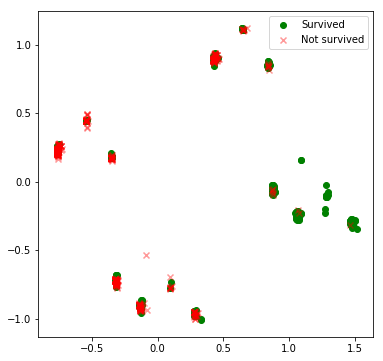

In [7]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
squeezed = model.fit_transform(scaled_x)

plt.figure(figsize=(6, 6))
plt.scatter(squeezed[df_prep_y == 1][:, 0], squeezed[df_prep_y == 1][:, 1], color='green', label='Survived')
plt.scatter(squeezed[df_prep_y == 0][:, 0], squeezed[df_prep_y == 0][:, 1], color='red', marker='x', alpha=0.4,
           label='Not survived')
plt.legend()
plt.show()

# t-SNE
t-SNE (t-distributed Stohastic Neighbor Embedding), метод отображения из многомерного признакового пространства на плоскость (или в 3D), чтобы точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие.

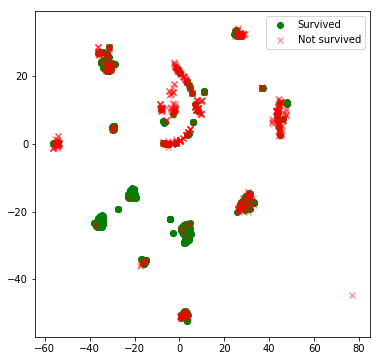

In [8]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
squeezed = model.fit_transform(scaled_x)

plt.figure(figsize=(6, 6))
plt.scatter(squeezed[df_prep_y == 1][:, 0], squeezed[df_prep_y == 1][:, 1], color='green', label='Survived')
plt.scatter(squeezed[df_prep_y == 0][:, 0], squeezed[df_prep_y == 0][:, 1], color='red', marker='x', alpha=0.4,
           label='Not survived')
plt.legend()
plt.show()

# Метод ближайших соседей (k-NN)

Метод k-ближайших соседей (k-nearest neighbors algorithm) — метрический алгоритм для автоматической классификации объектов или регрессии.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
1. Вычислить расстояние до каждого из объектов обучающей выборки
2. Отобрать  объекты обучающей выборки, расстояние до которых минимально
3. Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди ближайших соседей

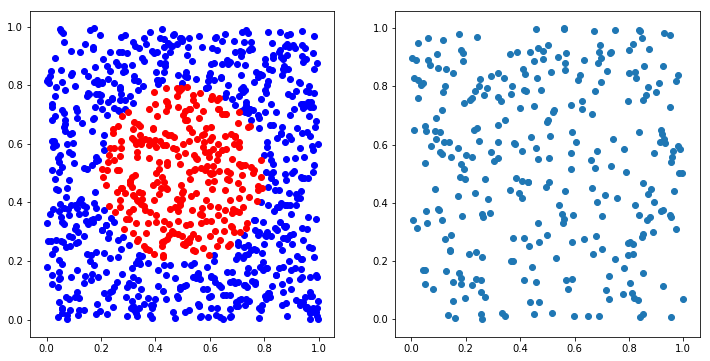

In [9]:
# Сгенерируем данные с 2 признаками
np.random.seed(18182)
data_test = np.random.rand(300, 2)
data_train = np.random.rand(1000, 2)
# Обозначим как позитивные данные в радиусе 0.3 от точки (0.5; 0.5)
label_train = (((data_train - 0.5) ** 2).sum(axis=1) < 0.3 ** 2).astype(float)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_train[:, 0][label_train == 0], data_train[:, 1][label_train == 0], color='blue')
plt.scatter(data_train[:, 0][label_train == 1], data_train[:, 1][label_train == 1], color='red')
plt.subplot(1, 2, 2)
plt.scatter(data_test[:, 0], data_test[:, 1])
plt.show()

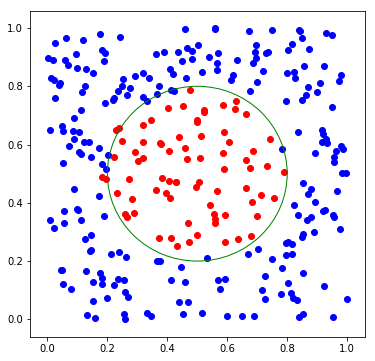

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Дерево решений (Decision Tree)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(df_prep_x_num, df_prep_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

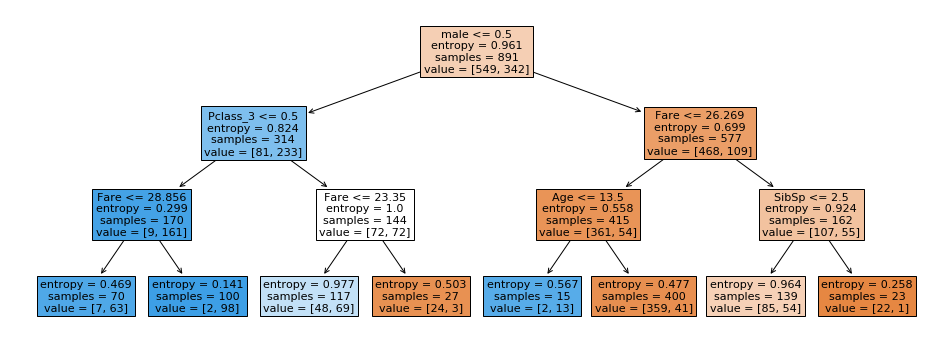

In [12]:
plt.figure(figsize=(16, 6))
tree.plot_tree(model, feature_names=df_prep_x_num.columns, filled=True)
plt.show()

### Энтропия (степень хаоса или неопределенности в системе)
$$
S = -{\sum_{n}p_ilog_2p_i}
$$
n - число классов  
$p_i$ - вероятность i класса
$$
p_0 = {549 \over 891} = 0.6161
$$  

$$
p_1 = {342 \over 891} = 0.3838
$$


$$
S_0 =  -p_0log_2p_0 - p_1log_2p_1 = 0.9607
$$

### Прирост информации
$$
IG = S_0 - \sum_q{N_i\over N}S_i
$$
q - число групп после разбиения  
$N_i$ – число элементов выборки

$$
IG = 0.891 - {314\over891}*0.824 - {577\over891}*0.699 = 0.1479
$$

### Важность признаков

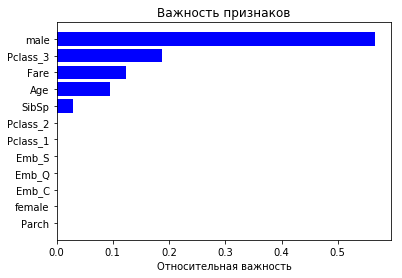

In [13]:
importances = model.feature_importances_
features = df_prep_x_num.columns
# Добавление сортировки по важности
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

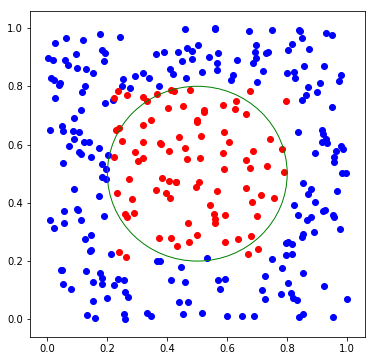

In [14]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Линейная регрессия

$$
y = w_0 + \sum_{i=1}^m w_ix_i
$$

$$x_0 = 1$$

$$
y = \sum_{i=0}^m w_ix_i
$$

$$
\vec{y} = X \vec{w} + \epsilon
$$

$\vec{y}$ – объясняемая (или целевая) переменная  
$\vec{w}$ – вектор параметров модели (веса)  
X – матрица признаков  
$\epsilon$ –  случайная переменная, соответствующая случайной, непрогнозируемой ошибке модели

### Ошибка модели
Метод наименьших квадратов - минимизация среднеквадратичной ошибки между реальным значением зависимой переменной и прогнозом, выданным моделью:
$$
L(X, \vec{y}, \vec{w}) = {1\over2n}\sum_{i=1}^n(y_i-\vec{w}^T\vec{x}_i)^2 = {1\over2n} ||\vec y - X \vec w||_2^2
$$

$$
{\partial L \over \partial \vec w} = 0
$$

### Регуляризация
w может принимать большие значения, что приведёт к нестабильной оценке параметров модели, т.е. добавление нового наблюдения в набор тренировочных данных приведёт к совершенно другому решению. Одним из способов борьбы с этим является регуляризация. Один из вариантов - регуляризация Тихонова:
$$
L(X, \vec{y}, \vec{w}) = {1\over2n} ||\vec y - X \vec w||_2^2 + ||\Gamma \vec w || ^2
$$

$\Gamma$ - матрица Тихонова (коэффициент регуляризации)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Логистическая регрессия

Линейный классификатор:
$$
a(\vec x) = sign(\vec w^Tx)
$$
sign() - функция, возвращающая знак своего аргумента  
$a(\vec x)$ - ответ классификатора (1 - целевой клас, -1 - отрицательный пример)  

Логистическая регрессия является частным случаем линейного классификатора, но она может выражать вероятность отнесения функции к положительному классу ($p_+$):
$$
p_+ = P(y_i = 1| \vec x_i, \vec w)
$$
P(X) - вероятность события X

$f(\vec x_i, \vec w) = \vec x_i \vec w = 0$ - разделяющая плоскость  
f > 0 - класс "+"  
f < 0 - класс "-"  
f = 0 - непоределённость  

Но давнные функции имеют разные пределы:  
$f \in (-\infty ; \infty)$  
$P \in [0 ; 1]$

Введём функцию отношения вероятностей:
$$
OR(X) = {P(X) \over 1 - P(X)}
$$
$OR \in (0 ; \infty)$, а $ln(OR) \in (-\infty ; \infty)$

Таким образом
$log(OR_+) = \vec w^T \vec x_i $ или $OR_+ = e^{\vec w^T \vec x_i }$

$$
p_+ = {OR_+ \over 1 + OR_+} = {e^{\vec w^T \vec x_i } \over 1 + e^{\vec w^T \vec x_i }} = {1 \over 1 + e^{-\vec w^T \vec x_i }} = \sigma(\vec w^T \vec x_i )
$$
$\sigma(x)$ - сигмоид-функция 
![sigmoid](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Вероятность отнесения функции к отрицательному классу:
$$
p_- = P(y_i = -1| \vec x_i, \vec w) = \sigma(-\vec w^T \vec x_i  )
$$

Обобщение:
$$
P(y = y_i| \vec x_i, \vec w) = \sigma(y_i\vec w^T \vec x_i  )
$$

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(scaled_x, df_prep_y)

y_pred = model.predict(scaled_x_tst)
print('Классы:', y_pred[:4])
y_proba = model.predict_proba(scaled_x_tst)
print('Вероятности:\n', y_proba[:4])

Классы: [0 1 0 0]
Вероятности:
 [[0.85226449 0.14773551]
 [0.49909854 0.50090146]
 [0.72998682 0.27001318]
 [0.88306963 0.11693037]]


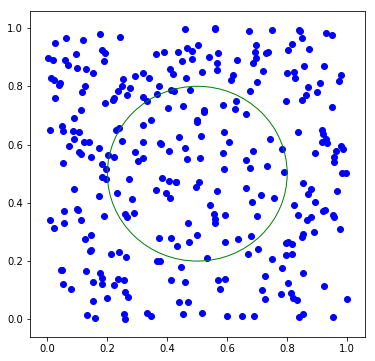

In [17]:
# В данном случае модель на смогла подобрать разделяющую гиперплоскость
model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Случайный лес
Алгоритм:
1. Сгенерировать подвыборку из данных
2. Построить решающее дерево  по подвыборке
3. Повторить шаги 1, 2 K раз
4. Результат принимается как результат большинства (классификация) или среднему (регрессия)

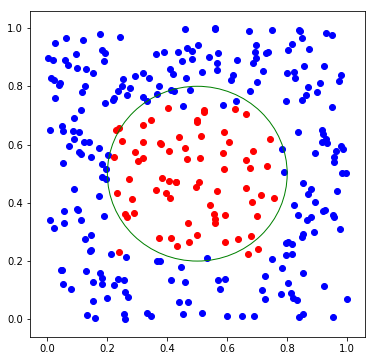

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# XGBoost
Алгоритм для K шага:
1. Сгенерировать подвыборку из данных
2. Построить решающее дерево  по подвыборке. Целевая величина $y - pred_{K-1}$, где $pred_{K-1}$ - предсказание комбинации прошлых деревьев
3. Добавить новое дерево к имеющемуся результату из комбинации прошлых деревьев так, чтобы минимизировать ошибку

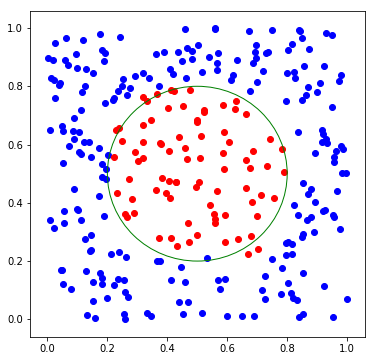

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model.fit(data_train, label_train)
predict = model.predict(data_test)

plt.figure(figsize=(6, 6))
plt.scatter(data_test[:, 0][predict == 0], data_test[:, 1][predict == 0], color='blue')
plt.scatter(data_test[:, 0][predict == 1], data_test[:, 1][predict == 1], color='red')
# Отрисовка круга происходит через создание фигуры и добавления её на график
circle = plt.Circle((0.5, 0.5), 0.3, color='g', fill=False)
plt.gcf().gca().add_artist(circle)
plt.show()

# Кластеризация

![sklearn clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

# K-means

Алгоритм:  
1. Выбирается количество кластеров (k)  
2. Случайным образом выбираются k точек, как центры кластеров  
3. Для всех точек выборки определяется к какому центру они ближе  
4. Переместить центры кластеров в центры выборок  
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения)

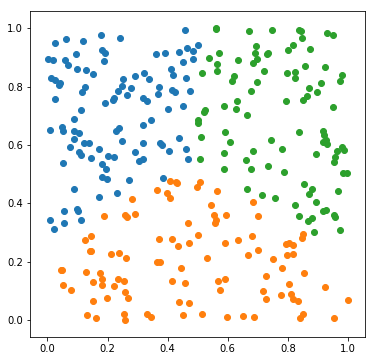

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
clusters = model.fit_predict(data_test)

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = data_test[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1])
plt.show()

# DBSCAN

Алгоритм DBSCAN (Density-based spatial clustering of applications with noise) рассматривает кластеры как области высокой плотности, разделенные областями низкой плотности. Из-за этого довольно общего представления кластеры, найденные DBSCAN, могут иметь любую форму, в отличие от k-means, которые предполагают, что кластеры имеют выпуклую форму.  
Этот алгоритм позволяет выделять произвольное количество кластеров, основываясь на расстоянии между ними. 

6 кластеров


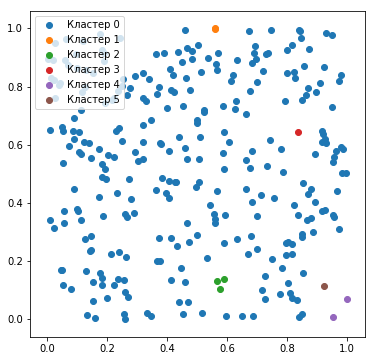

In [21]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.08, min_samples=1)
clusters = model.fit_predict(data_test)
print(np.unique(clusters).size, 'кластеров')

plt.figure(figsize=(6, 6))
for cl in np.unique(clusters):
    data_ = data_test[clusters == cl]
    plt.scatter(data_[:, 0], data_[:, 1], label='Кластер {}'.format(cl))
plt.legend(loc=2)
plt.show()

# Ресурсы для углублённого изучения темы

* [Открытый курс машинного обучения Open Data Science](https://habr.com/ru/company/ods/blog/322626/)
* [Видеолекции ШАД Воронцова](https://yandexdataschool.ru/edu-process/courses/machine-learning)
* [Классический курс по машинному обучению. Включает в себя как элементы классического ML так и нейронные сети](https://www.coursera.org/learn/machine-learning)
* [Лекции об инструментах, которые нужны, чтобы начать применять ML на практике](https://www.dataschool.io/)

# Задания

1. Разделите данные Титаника (*train.csv*) на тренировочную, валидационную и тестовую часть. С помощью валидационной части подберите гиперпараметры для моделей Random Forest, XGBoost, Logistic Regression и KNN. Получите точность этих моделей на тестовой части.
2. С помощью RandomForest выберите 2, 4, 8 самых важных признаков и проверьте точность моделей только на этих признаках.
3. Используя координаты скважин из файла *wells_info.csv* разделите их на кластера с помощью любых 4 методов и отобразите разделение. Параметры подбираются самостоятельно.
4. Приведите отобранные в 6.1 задании признаки из файла *wells_info_with_prod.csv* в двумерное пространство. Выделите цветом добычу с этой скважины.